<a href="https://colab.research.google.com/github/vitor-thompson/aula_python_uerj/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Criar uma Classe Perceptron em Python.


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class Perceptron:
    """
    Implementação do algoritmo Perceptron para classificação binária.

    Este modelo utiliza a função de ativação de passo unitário (step function)
    para tomar uma decisão baseada em uma soma ponderada das entradas.
    """

    def __init__(self, no_of_inputs, threshold = 100, learning_rate = 0.01):
        '''
        Método de inicialização que tem os seguintes atributos:

        no_of_inputs: número de features passadas como input ao perceptron (Neste caso, 2: Comprimento e Largura da Pétala).
        threshold: número de iterações de atualização do peso (epochs).
        learning_rate: taxa com a qual os pesos são atualizados a cada iteração (eta).
        weights: inicialização dos pesos. O vetor dos pesos terá no_of_inputs + 1 elementos
                 por conta do bias, que é o primeiro elemento.
        '''

        self.learning_rate = learning_rate  # Taxa de aprendizado (eta)
        self.threshold = threshold          # Número de épocas (limiar de iteração)

        # Inicialização do vetor de pesos (weights).
        # O tamanho é no_of_inputs + 1, onde weights[0] será o bias (w_0).
        # Usamos np.zeros, como sugerido.
        self.weights = np.zeros(no_of_inputs + 1)

        # Atributo para armazenar os erros por época (útil para análise posterior)
        self.errors_per_epoch = []


    def predict(self, inputs):
        '''
        Método de implementação da função de ativação.

        inputs: array com o conjunto de inputs (features).

        Não se esquecer que o produto da função de ativação é um produto escalar e
        pode ser calculado pelo método np.dot.

        Retorna 1 se a entrada líquida for não-negativa (z >= 0), e -1 ou 0 caso contrário.
        Geralmente, na versão clássica do Perceptron para cálculo do erro, usamos {1, -1}.
        '''

        # O cálculo da entrada líquida (z) é: z = w_1*x_1 + w_2*x_2 + ... + w_n*x_n + w_0

        # O vetor de pesos self.weights é [w_0, w_1, w_2, ...]
        # O vetor de entradas precisa ser estendido para [1, x_1, x_2, ...] para que np.dot funcione:

        # 1. Extender inputs para incluir a entrada do bias (1.0)
        # A diferença é que para uma única amostra (1D array), `np.insert` funciona de um jeito.
        # Para múltiplas amostras (2D array), precisamos adicionar uma coluna de 1.0.
        if inputs.ndim == 1:
            extended_inputs = np.insert(inputs, 0, 1.0)
        else: # inputs.ndim == 2 para múltiplas amostras
            extended_inputs = np.insert(inputs, 0, 1.0, axis=1)

        # 2. Calcular a entrada líquida (net input)
        net_input = np.dot(extended_inputs, self.weights)

        # 3. Função de Ativação (Step Function)
        # Retorna 1 se z >= 0, e -1 se z < 0.
        return np.where(net_input >= 0.0, 1, -1)


    def train(self, X, y):
        '''
        Método de treino. É aqui que os pesos são atualizados um certo número de vezes
        (determinado pelo valor do threshold).

        Nesse método é feita a comparação entre o resultado da função de ativação (predição) e
        o resultado esperado (label).

        O método deve atualizar tanto os pesos quanto o bias (o bias é o primeiro valor do
        vetor peso e tem input 1).
        A atualização é feita iterativamente um número (threshold) de vezes (épocas).

        X: Matriz de features de treinamento (Ex: [[x1_flor1, x2_flor1], [x1_flor2, x2_flor2], ...])
        y: Vetor de labels esperados (Ex: [1, -1, 1, ...])
        '''

        # Loop sobre o número de épocas (threshold)
        for epoch in range(self.threshold):
            errors = 0  # Contador de erros para a época atual

            # Loop sobre cada amostra de treinamento (x_i, target_i)
            for inputs, target in zip(X, y):

                # 1. Calcular a predição
                # Garante que predict receba uma única amostra 1D para o treinamento
                prediction = self.predict(inputs)

                # 2. Calcular o erro (diferença entre esperado e predito)
                error = target - prediction

                # 3. Se houver erro, atualizar pesos e bias
                if error != 0:
                    errors += 1

                    # Regra de Atualização: Δw_j = η * (y - ŷ) * x_j
                    # Atualização do Bias (w_0):
                    # O bias (self.weights[0]) é o peso do input constante 1.
                    # Δw_0 = η * (y - ŷ) * 1
                    self.weights[0] += self.learning_rate * error * 1.0

                    # Atualização dos Pesos (w_1, w_2, ...):
                    # O restante do vetor de pesos (a partir do índice 1) é atualizado
                    # com as entradas reais (inputs).
                    # self.weights[1:] é o slice [w_1, w_2, ...]
                    self.weights[1:] += self.learning_rate * error * inputs

            # Armazenar o número de erros para esta época
            self.errors_per_epoch.append(errors)

            # Condição de parada: se não houver erros (0 erros), o dataset é linearmente
            # separável e podemos parar o treino.
            if errors == 0:
                print(f"Convergiu na Época {epoch + 1}!")
                break

        return self # Retorna o objeto Perceptron treinado

# 2) Aplique essa classe nos dados das flores Iris para determinar se uma Iris com um certo comprimento e largura da pétala é uma Iris Setosa.


In [ ]:
iris = load_iris() # returns a dictionary-like object
# características (features) das flores Iris:
print(iris.target_names)
print(iris.feature_names)

# Pelo primeiro print acima, as features são: 0: sepal length, 1: sepal width, 2: petal length, 3: petal width
# Vamos selecionar somente as features petal length e petal width:
X = iris.data[:, (2,3)]  # nos retorna um array com 150 conjuntos de inputs
y = np.where(iris.target == 0, 1, -1) # label = iris setosa. 1 para Setosa, -1 para não Setosa.
print("iris setosa classification: ", y)

# Modificado: Instanciar Perceptron com o número correto de inputs (2)
perceptron_clf = Perceptron(no_of_inputs=2)      # dois inputs: comprimento e largura da pétala
perceptron_clf.train(X,y)            # Train

y_pred = perceptron_clf.predict([[1,0.5]])  # predict
print(y_pred)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris setosa classification:  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
Convergiu na Época 3!
1


In [ ]:
# Modelo de como deve funcionar com a classe criada nesse projeto
perceptron = Perceptron(2) # Assume MyPerceptron is defined in an earlier cell
X = iris.data[:, (2,3)]             # inputs
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim
#print(y)

treino = perceptron.train(X,y)
pred = perceptron.predict([1, 0.5])
print(pred)

1


# 3) Compare o resultado da sua classe com a classe Peceptron do módulo do scikit-learn linear_model.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --- 1. Preparação dos Dados ---
iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(int) # Setosa (1) vs. Não-Setosa (0)

# Separação (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Mapear os labels de teste para {-1, 1} para comparação
y_test_mapped = np.where(y_test == 0, -1, 1)

# --- 2. Treinamento e Avaliação ---
print("## 1. Perceptron Customizado (Sua Implementação) ##")
# Usamos os dados PADRONIZADOS no nosso modelo também para uma comparação justa
ppn_custom = Perceptron(no_of_inputs=2, threshold=20, learning_rate=0.01)
ppn_custom.train(X_train, y_train)

y_pred_custom = ppn_custom.predict(X_test)
acc_custom = accuracy_score(y_test_mapped, y_pred_custom)

print(f"Acurácia Customizada: {acc_custom * 100:.2f}%")
print(f"Pesos Finais Customizados (Bias e W1 e W2): {ppn_custom.weights}")
print("-" * 50)


# --- 3. Treinamento e Avaliação (Scikit-learn Perceptron) ---
print("## 2. Perceptron do Scikit-learn ##")

# Os parâmetros do Sklearn Perceptron:
# max_iter: número de épocas (equivalente ao nosso 'threshold')
# eta0: taxa de aprendizado (equivalente ao nosso 'learning_rate')
# fit_intercept=True: Inclui o bias
# random_state: para reprodutibilidade
# penalty=None: O perceptron clássico não usa regularização
# tol=None: Desativa a parada de convergência automática do SGD.

ppn_sklearn = SklearnPerceptron(
    eta0=0.01,         # learning_rate
    max_iter=20,       # threshold
    random_state=42,
    fit_intercept=True,
    penalty=None,
    tol=None
)

# O Sklearn espera labels {0, 1} ou {-1, 1}. Usaremos {0, 1}
ppn_sklearn.fit(X_train, y_train)

y_pred_sklearn = ppn_sklearn.predict(X_test)

# O Sklearn prevê labels {0, 1} por padrão. Mapeamos para {-1, 1} para comparar com o Perceptron.
y_pred_sklearn_mapped = np.where(y_pred_sklearn == 0, -1, 1)
acc_sklearn = accuracy_score(y_test_mapped, y_pred_sklearn_mapped)


print(f"Acurácia Scikit-learn: {acc_sklearn * 100:.2f}%")
# O Scikit-learn armazena os pesos (W1..W4) em .coef_ e o bias em .intercept_
print(f"Pesos Finais Sklearn (W1 e W2): {ppn_sklearn.coef_[0]}")
print(f"Bias Final Sklearn (W0): {ppn_sklearn.intercept_[0]}")
print("-" * 50)

## 1. Perceptron (Sua Implementação) ##
Acurácia Customizada: 33.33%
Pesos Finais Customizados (Bias e W1 e W2): [0.12  0.03  0.036]
--------------------------------------------------
## 2. Perceptron do Scikit-learn ##
Acurácia Scikit-learn: 100.00%
Pesos Finais Sklearn (W1 e W2): [-0.013 -0.022]
Bias Final Sklearn (W0): 0.04
--------------------------------------------------


# 4) Você pode pensar em algum outro exemplo em que possa aplicar o modelo do Perceptron? Quando esse modelo falha?

# Resposta.

Detecção de Partículas: Em experimentos com aceleradores, o Perceptron poderia ser usado para classificar de forma inicial os sinais brutos de um detector. Por exemplo, se a energia e o momento de uma partícula estiverem em uma relação linearmente separável para dois tipos de partículas (Ex: Múons vs. Píons).

Entradas: Energia (E), Momento (p).

Saída: Tipo A (1) ou Tipo B (-1).

Controle de Qualidade Simples: Em materiais, classificar peças como "aceitável" (1) ou "defeituosa" (-1) com base em duas propriedades físicas que variam linearmente, como:

Entradas: Dureza e Densidade.

Quando o Modelo Perceptron Falha?

A falha mais notória do Perceptron está ligada à sua natureza fundamental: ser um classificador linear.

O Perceptron falha sempre que os dados de treinamento não são linearmente separáveis.

# 5) Você pode expandir o código para considerar também o comprimento e largura da sépala como features.
# 6) Você pode separar a amostra das Iris em duas: uma para treino e outra para teste. O scikit-learn tem um método que faz isso pra você: o train_test_split; Compare cada uma das Iris de teste com o label ==> coloque o resultado em um gráfico (classificação versus label);

Total de amostras: 150
Amostras para Treino (70%): 105
Amostras para Teste (30%): 45
------------------------------
Acurácia do Perceptron no Conjunto de Teste: 33.33%
------------------------------


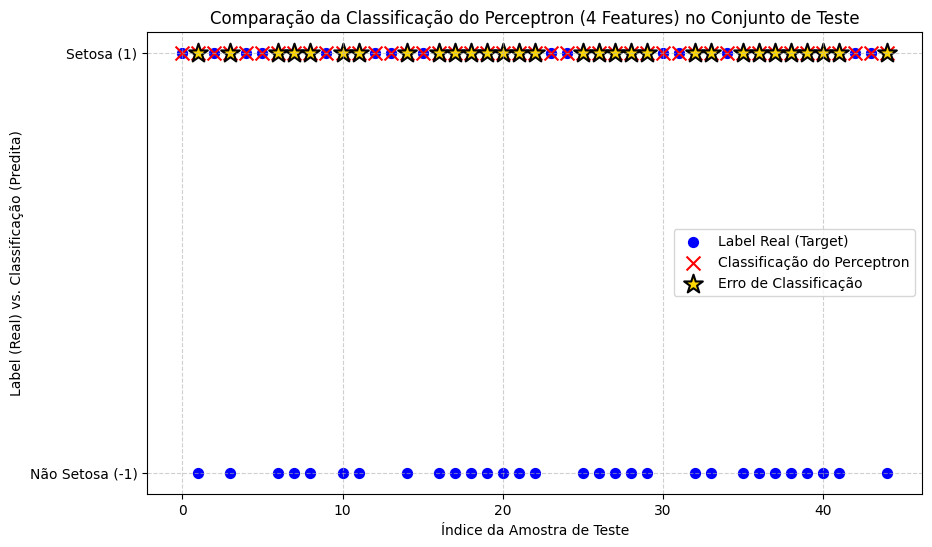

In [ ]:
perceptron2 = Perceptron(4)
X = iris.data[:, :]             # inputs
y = (iris.target == 0).astype(int)  # label = iris setosa. Retorna uma lista com os labels da Iris-Setosa. 0: não, 1: sim
#print(y)

# 2. Separar em Treino e Teste (usando train_test_split)
# Usaremos 70% dos dados para treino e 30% para teste (random_state garante reprodutibilidade)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Total de amostras: {len(X)}")
print(f"Amostras para Treino (70%): {len(X_train)}")
print(f"Amostras para Teste (30%): {len(X_test)}")
print("-" * 30)

# 3. Inicializar e Treinar o Perceptron
# no_of_inputs = 4
perceptron2 = Perceptron(no_of_inputs=4, threshold=20, learning_rate=0.01)
perceptron2.train(X_train, y_train)

# 4. Avaliação (Predição)
# Previsão dos labels para o conjunto de TESTE
y_pred = perceptron2.predict(X_test)

# Para comparação, precisamos mapear y_test (0 e 1) para o formato do nosso modelo (-1 e 1)
y_test_mapped = np.where(y_test == 0, -1, 1)

# Cálculo da Acurácia
accuracy = accuracy_score(y_test_mapped, y_pred)
print(f"Acurácia do Perceptron no Conjunto de Teste: {accuracy * 100:.2f}%")
print("-" * 30)

# 5. Geração do Gráfico de Comparação

# Criar um array de índices para o eixo X (o número da amostra de teste)
indices_teste = np.arange(len(y_test))

plt.figure(figsize=(10, 6))

# Plotar os Labels Reais (y_test)
plt.scatter(
    indices_teste,
    y_test_mapped,
    marker='o',
    s=50,
    label='Label Real (Target)',
    color='blue'
)

# Plotar as Classificações (y_pred)
# Usaremos 'x' para representar as previsões
plt.scatter(
    indices_teste,
    y_pred,
    marker='x',
    s=100,
    label='Classificação do Perceptron',
    color='red'
)

# Destacar os pontos onde o Perceptron ERROU (Onde y_pred != y_test_mapped)
erros = (y_pred != y_test_mapped)
indices_erros = indices_teste[erros]
plt.scatter(
    indices_erros,
    y_pred[erros],
    marker='*',
    s=200,
    label='Erro de Classificação',
    color='gold',
    edgecolors='black',
    linewidth=1.5
)

plt.yticks([-1, 1], ['Não Setosa (-1)', 'Setosa (1)'])
plt.xlabel('Índice da Amostra de Teste')
plt.ylabel('Label (Real) vs. Classificação (Predita)')
plt.title(f'Comparação da Classificação do Perceptron (4 Features) no Conjunto de Teste')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 7) Ponto extra para quem implementar a função de ativação sigmoid no lugar da Heaviside e/ou melhorar a estimativa do erro.

In [40]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class PerceptronSigmoid:
    """
    Implementação da base de uma Rede Neural (MLP/Logistic Regression)
    usando a função de ativação Sigmoide e a regra de ajuste de peso
    baseada no Gradiente.
    """

    def __init__(self, no_of_inputs, threshold=10, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.threshold = threshold
        # Inicializa pesos com pequenos valores aleatórios (melhor para sigmoide)
        self.weights = np.random.randn(no_of_inputs + 1) * 0.01
        self.cost_per_epoch = [] # Armazenar o custo/erro contínuo

    def _net_input(self, inputs):
        """Calcula a entrada líquida (z = w_0 + w_1*x_1 + ...)"""
        # Adiciona o bias (1.0) na posição 0
        if inputs.ndim == 1:
            extended_inputs = np.insert(inputs, 0, 1.0)
            return np.dot(extended_inputs, self.weights)
        else:
            extended_inputs = np.insert(inputs, 0, 1.0, axis=1)
            return np.dot(extended_inputs, self.weights)

    def activation(self, z):
        """Função de Ativação Sigmoide (phi)"""
        # Garante a estabilidade numérica (evita overflow em e^-z)
        z = np.clip(z, -500, 500)
        return 1.0 / (1.0 + np.exp(-z)) #

    def predict_proba(self, inputs):
        """Retorna a probabilidade (saída contínua da sigmoide)"""
        z = self._net_input(inputs)
        return self.activation(z)

    def predict(self, inputs):
        """Retorna a classificação binária {1, 0} (limiar em 0.5)"""
        # Classifica 1 se probabilidade >= 0.5, senão 0
        return np.where(self.predict_proba(inputs) >= 0.5, 1, 0)

    def fit(self, X, y):
        # Mapeia y para {0, 1}, que é o padrão da Sigmoide para Cross-Entropy (nosso y já está assim)

        for epoch in range(self.threshold):
            avg_cost = 0.0

            # Gradiente Descendente Estocástico (atualização por amostra)
            for inputs, target in zip(X, y):

                # 1. Feedforward
                z = self._net_input(inputs)
                a = self.activation(z) # Saída contínua (0 a 1)

                # 2. Cálculo do Erro Contínuo (Delta)
                # O termo de erro (gradiente) para a atualização de peso
                # Se usarmos Cross-Entropy, o erro final é (a - target)
                # Se usarmos MSE, o erro final é (target - a) * a * (1 - a)

                # Usaremos a forma simplificada do erro: delta = (previsão - target)
                # (Esta é a forma padrão quando se usa Cross-Entropy para saída sigmoide)
                delta = a - target

                # 3. Atualização de Pesos (Bias e Pesos)
                # Atualização do Bias (w_0)
                self.weights[0] -= self.learning_rate * delta * 1.0

                # Atualização dos Pesos (w_1, w_2, ...)
                self.weights[1:] -= self.learning_rate * delta * inputs

                # 4. Cálculo do Custo (usando Log Loss/Cross-Entropy para a Sigmoide)
                # Custo/Loss para uma única amostra
                # np.clip garante estabilidade numérica (evita log(0))
                a = np.clip(a, 1e-15, 1 - 1e-15)
                cost = -target * np.log(a) - (1 - target) * np.log(1 - a)
                avg_cost += cost

            self.cost_per_epoch.append(avg_cost / len(y))
            # O critério de parada não é mais erro=0, mas sim a estabilização do custo

        return self

# --- Demonstração com os dados Iris ---
iris = load_iris()
X = iris.data[:, :]
y = (iris.target == 0).astype(int) # Setosa (1) vs. Não-Setosa (0)

# Padronização é essencial para Gradiente Descendente!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Inicializar e Treinar o novo modelo (Sigmoide)
mlpc_clf = PerceptronSigmoid(no_of_inputs=4, threshold=100, learning_rate=0.01)
mlpc_clf.fit(X_train, y_train)

# Avaliação
y_pred_proba = mlpc_clf.predict_proba(X_test)
y_pred = mlpc_clf.predict(X_test)
acc_sigmoid = accuracy_score(y_test, y_pred)

print("--- Perceptron com Sigmoide e Gradiente Descendente ---")
print(f"Acurácia (limiar 0.5): {acc_sigmoid * 100:.2f}%")
print(f"Custo final (Log Loss): {mlpc_clf.cost_per_epoch[-1]:.4f}")

# Exemplo de predição de probabilidade:
print(f"Probabilidade da primeira amostra de teste ser Setosa: {y_pred_proba[0]:.4f}")

--- Perceptron com Sigmoide e Gradiente Descendente ---
Acurácia (limiar 0.5): 100.00%
Custo final (Log Loss): 0.0099
Probabilidade da primeira amostra de teste ser Setosa: 0.9963


Total de amostras: 150
Amostras para Treino (70%): 105
Amostras para Teste (30%): 45
------------------------------
Acurácia do Perceptron no Conjunto de Teste: 100.00%
------------------------------


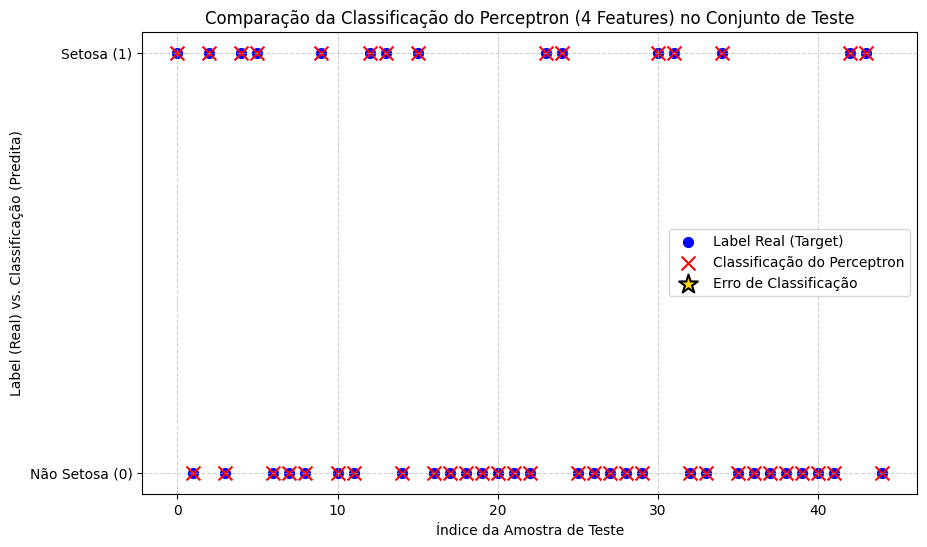

In [41]:
# 1. Preparação Inicial dos Dados
perceptron3 = PerceptronSigmoid(4) # Instancia um PerceptronSigmoid com 4 entradas
X = iris.data[:, :]             # Carrega todas as 4 features do dataset Iris (sepal length, sepal width, petal length, petal width)
y = (iris.target == 0).astype(int)  # Define o label: 1 para Iris Setosa, 0 para outras espécies (Não-Setosa)
#print(y) # Linha comentada para não imprimir o array de labels

# 2. Separar em Treino e Teste (usando train_test_split)
# Esta função divide os dados em conjuntos de treinamento e teste para avaliar o modelo de forma imparcial.
# Usaremos 70% dos dados para treino e 30% para teste (test_size=0.3).
# random_state garante que a divisão seja a mesma cada vez que o código for executado (reprodutibilidade).
# stratify=y garante que a proporção de classes (Setosa vs. Não-Setosa) seja mantida em ambos os conjuntos.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Exibe o número de amostras em cada conjunto
print(f"Total de amostras: {len(X)}")
print(f"Amostras para Treino (70%): {len(X_train)}")
print(f"Amostras para Teste (30%): {len(X_test)}")
print("-" * 30)

# 3. Inicializar e Treinar o Perceptron
# Instancia o PerceptronSigmoid com os parâmetros definidos:
# no_of_inputs=4: O modelo espera 4 features.
# threshold=100: O modelo irá treinar por 100 épocas (iterações sobre todo o conjunto de treino).
# learning_rate=0.01: Taxa de aprendizado para ajustar os pesos do modelo.
perceptron3 = PerceptronSigmoid(no_of_inputs=4, threshold = 100, learning_rate=0.01)
perceptron3.fit(X_train, y_train) # Treina o modelo com os dados de treino padronizados

# 4. Avaliação (Predição)
# Previsão dos labels para o conjunto de TESTE com dados padronizados
y_pred = perceptron3.predict(X_test)

# Para comparação no gráfico, mapeamos os labels de teste originais (0 e 1) para o formato do nosso modelo (-1 e 1),
# embora para a acurácia, comparar 0 e 1 diretamente com 0 e 1 seja o ideal.
y_test_mapped = np.where(y_test == 0, -1, 1) # Mapeia 0 para -1 e 1 para 1

# Cálculo da Acurácia
# A accuracy_score compara os labels reais (y_test, que são 0 ou 1) com as previsões do modelo (y_pred, que também são 0 ou 1).
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Perceptron no Conjunto de Teste: {accuracy * 100:.2f}%")
print("-" * 30)

# 5. Geração do Gráfico de Comparação

# Criar um array de índices para o eixo X (representa o número da amostra de teste)
indices_teste = np.arange(len(y_test))

plt.figure(figsize=(10, 6)) # Define o tamanho da figura para o gráfico

# Plotar os Labels Reais (y_test)
# 'o' é o marcador para os pontos reais
plt.scatter(
    indices_teste,
    y_test, # Usa os labels reais (0 ou 1) para plotar
    marker='o',
    s=50,
    label='Label Real (Target)',
    color='blue'
)

# Plotar as Classificações (y_pred) do Perceptron
# 'x' é o marcador para as previsões do modelo
plt.scatter(
    indices_teste,
    y_pred,
    marker='x',
    s=100,
    label='Classificação do Perceptron',
    color='red'
)

# Destacar os pontos onde o Perceptron ERROU (Onde y_pred é diferente de y_test)
# Calcula um booleano array onde 'True' indica um erro
erros = (y_pred != y_test)
indices_erros = indices_teste[erros] # Pega os índices das amostras onde houve erro
plt.scatter(
    indices_erros,
    y_pred[erros], # Plota as previsões erradas
    marker='*', # Marcador de estrela para erros
    s=200, # Tamanho maior para destacar
    label='Erro de Classificação',
    color='gold',
    edgecolors='black',
    linewidth=1.5
)

# Ajusta os rótulos do eixo Y para 'Não Setosa (0)' e 'Setosa (1)' para melhor compreensão
plt.yticks([0, 1], ['Não Setosa (0)', 'Setosa (1)'])
plt.xlabel('Índice da Amostra de Teste') # Rótulo do eixo X
plt.ylabel('Label (Real) vs. Classificação (Predita)') # Rótulo do eixo Y
plt.title(f'Comparação da Classificação do Perceptron (4 Features) no Conjunto de Teste') # Título do gráfico
plt.legend() # Exibe a legenda
plt.grid(True, linestyle='--', alpha=0.6) # Adiciona uma grade ao gráfico
plt.show() # Mostra o gráfico